In [41]:
import pandas as pd
import nltk
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
from matplotlib import pyplot as plt

In [3]:
stopWords = stopwords.words('english')

In [4]:
cablesDF = pd.read_csv('CFPF-JIEYAN - data.csv')

In [5]:
cablesText = cablesDF['BODY']

In [6]:
for (i, text) in enumerate(cablesText):
    try:
        cablesText[i] = text.lower()
    except:
        cablesText[i] = 'n/a'
cablesText

0      mrn: 1973peking001397  segment number: 000001 ...
1      mrn: 1973nato b006022  segment number: 000001 ...
2      mrn: 1973nato b006060  segment number: 000001 ...
3      mrn: 1973nato b006064  segment number: 000001 ...
4      1.  need to get as detailed description of veh...
                             ...                        
624    1.  i saw king hussein january 10 on another i...
625    1. i saw richard, grennan, and mansfield at no...
626    2) begin text\ndear dr. kissinger,\nthank you ...
627    1. i arrived cape town 1330 today and with amb...
628    reference:  london 630\n1.  tony duff has give...
Name: BODY, Length: 629, dtype: object

In [7]:
for (i, text) in enumerate(cablesText):
    if cablesText[i] == 'n/a':
        print(i)

37
52
72
94
105
113
121
123
124
132
133
141
153
154
157
160
163
184
187
199
206
283
323
350
361
450
509
533
534
538
552
577
620
621
622


In [8]:
type(cablesText[620])

str

In [9]:
len(cablesText)

629

In [10]:
cables = [cablesText[i] for i in range(len(cablesText))]
cables[-1]

'reference:  london 630\\n1.  tony duff has given us the new british paper as\\nfinally approved by ministers and pointed out changes\\nfrom the first draft transmitted in reftel.\\n2.  the title, to which the foreign office attaches\\ngreat importance, has been changed to read, "suggestions\\nfor possible structure of transitional government:  note\\nby chairman of the conference."\\n3.  change para two, sentence four to read:  "but also\\nfor a participation by representatives of the european\\nminority sufficient to ensure that their interests were\\ntaken into account."\\n4.  change para three, sentence two to read:  "they\\nproceed on the basis that where solutions can be found\\nusing purely rhodesian elements, that should be done."\\n5.  change para five, sub-para one, sentence one to read:\\n"the transitional government would be headed by an\\ninterim commissioner who would be appointed by the britis\\ngovernment, after due consultations."\\n6.  change last word in para five, s

In [11]:
url = ('http://api.foiarchive.org/docs?'
       'corpus=eq.pdb&authored=gte.1973-01-01&'
       'select=doc_id,authored,classification,title,body')
response = requests.get(url)  # Make a GET request to the URL

# Print status code (and associated text)
print(f"Request returned {response.status_code} : '{response.reason}'")

# Print data returned (parsing as JSON)
payload = response.json()  # Parse `response.text` into JSON
print(len(payload))

import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(payload[-1])

Request returned 200 : 'OK'
1251
{'authored': '1977-01-04T00:00:00+00:00',
 'body': ' The President’s Daily Brief January 4, 1977 “Fp Sore Exempt from '
         'general declassificatan schedule of EO. 11652 exemption category '
         'SB()),(2443) declassified only on approval of the Director of '
         'Central Intelligence FOR THE PRESIDENT ONLY January 4, 1977 Table of '
         'Contents Rhodesia: Rhodesian nationalist leaders and presidents of '
         'the front-line African countries reportedly are considering ways to '
         'improve the military performance of the Rhodesian guer-~ rillas. '
         '(Page i) Note: India (Page 2) FOR THE PRESIDENT ONLY Vw i Atrican '
         'Republic’ i D Bangui ita taho x Yaounde st Es fal Gunga g —_ i& '
         'Libreville Congo J Gabon Vretona} Zaire “Dek ag \\Bujuphbura~” Ly '
         '‘undi fe Brazzaville Sar ie an ar soul Angol a Ae Lf X Namibia '
         '{South-West Africa) Oar es Salaam Lusake7” gaat ev indhagk Wal

In [12]:
type(payload)

list

In [13]:
pdbs = [payload[i]['body'] for i in range(len(payload))]

In [28]:
url2 = ('http://api.foiarchive.org/docs?'
       'corpus=eq.kissinger&authored=gte.1973-01-01&authored=lt.1977-02-01&'
       'select=doc_id,authored,classification,title,body')
url3 = ('http://api.foiarchive.org/docs?'
       'doc_id=eq.0000C195&'
       'select=corpus,authored,classification,title,body') # need to resolve this issue
response = requests.get(url3)  # Make a GET request to the URL

# Print status code (and associated text)
print(f"Request returned {response.status_code} : '{response.reason}'")

# Print data returned (parsing as JSON)
payload = response.json()  # Parse `response.text` into JSON
print(len(payload))

import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(payload)

Request returned 200 : 'OK'
0
[]


In [14]:
allTexts = cables + pdbs

In [15]:
tfidfVectorizer = TfidfVectorizer(max_features=400, stop_words=stopWords)
textMatrix = tfidfVectorizer.fit_transform(allTexts)
denseTextMatrix = textMatrix.todense()
denseTextMatrix.shape

(1880, 400)

In [16]:
pca = PCA(n_components=2)
textPoints = pca.fit_transform(denseTextMatrix)
textPoints.shape

(1880, 2)

In [104]:
colors = {'cables':'r', 'pdb':'b'}
labels = ['cables']*len(cables) + ['pdb']*len(pdbs)

In [105]:
textDF = pd.DataFrame({'C1':textPoints[:,0], 'C2':textPoints[:,1], 'labels':labels})

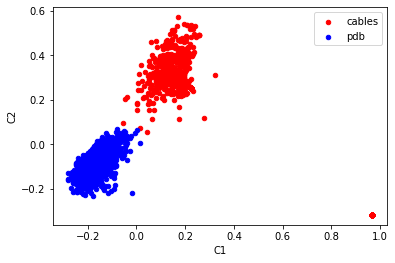

In [107]:
_, ax = plt.subplots()
for key,group in textDF.groupby('labels'):
    group.plot.scatter(ax=ax, x='C1', y='C2', label=key, color = colors[key]);
plt.show()